In [2]:
from IPython.display import Image, HTML

# Intro to TFLearn

> Siraj:
- how to build a neural network for sentiment analysis using a library called TFLearn. 

----
> In this lesson
- started with the library and provide some more background so you can get the most out of his video.

----
> TFLearn
- does a lot of the heavy lifting 
    - initializing weights
    - running the forward pass
    - taking care of backpropagation

----    
> First learning more about activation functions and a new cost function
- Activation functions: Rectified linear units (ReLUs) and Softmax
- Classification cost function: Categorical Cross Entropy

----
> Sentiment Analysis with TFLearn

----
> Handwritten digit recognition with TFLearn

# Activation function

> **purpose of activation function?**

# Why ReLU over sigmoid function as activation function

----
> sigmoid function: 
- used as activation function on our hidden units and on the output unit. 

----
> **Why sigmoids have fallen out of favor as activations on hidden units**
- the **derivative of the sigmoid** maxes out at 0.25 (see below). 
- error of hidden layers is calculated using output error or derivative of E
- meaning the errors going back into the network will be **shrunk by at least a quarter at every layer**
- For **layers close to the input layer**, the weight updates will be tiny if you have a lot of layers and those weights will **take a really long time to train**

In [2]:
Image(width=500, height=300, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5893d15c_sigmoids/sigmoids.png')

# What is Rectified Linear Units

> **rectified linear units (ReLUs)**
- Instead of sigmoids, **most recent deep learning networks use it for the hidden layers**. 
- A rectified linear unit has output 0 if the input is less than 0, and raw output otherwise. $$f(x)=\max(x,0)$$
- see image below for the function behavior

In [6]:
Image(width=300, height=100, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58915ae8_relu/relu.png')

### **ReLU activations** 

- the simplest non-linear activation function
- When the **input is positive, the derivative is 1**, so **no vanishing effect** on backpropagated errors from sigmoids 
- ReLUs result in much **faster** training for large networks [based on research](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf). 
- **No need implementation** of relu ourselves in most frameworks like TensorFlow and TFLearn.

## Drawbacks
- not clear what it means

#### My summary of what ReLU drawbacks is
- check [forum response on this](https://discussions.udacity.com/t/how-to-understand-relus-drawbacks-properly/217556?u=pystrategyexplorer)

**ReLU drawbacks is when learning_rate is too large, can cause many neuron death while model is still training**

The neuron death is achieved in both forward and backward pass together. 

----
> **Forward pass: **
- If learning_rate was set very large, it leads to overshoot;
- overshoot or divergence leads to large derivative or gradient;
- large gradient leads to big step change on weights; 
- such big change on weights that it causes all inputs flowing toward ReLU function are turned negative; 
- therefore, negative inputs to ReLU function by formula will always return 0;
- ReLU neural units don't fire, don't activate, are dead

----
> **Backward pass: **
- to update hidden weights, we need hidden_delta;
- to calc hidden_delta, we need hidden_error * derivative of ReLU(hidden_inputs)
- given hidden_inputs are negative (caused ReLU dead in forward pass), derivative of ReLU(hidden_inputs) can only return zero
- therefore, weight step for updating is also zero. 
- So, there is no update of hidden layer weights, there is no fire from hidden_ReLU neurons
- there is no forward and backward update at all and forever, this is neurons are (brain) dead but training (body) is still running

----
> Therefore, solution is to reduce learning_rate

#### What lesson and google say about ReLU drawbacks

> drawbacks: 
- It's possible that a large gradient can set the weights such
- that a ReLU unit will always be 0 (meaning, relu unit is dead)
- a lot of computation will be wasted in training (meaning, compute a lot but return just 0s, so it is a waste)

----
> From Andrej Karpathy's CS231n course:
- Unfortunately, ReLU units can be fragile during training and can “die”. 
- a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again
- If this happens, then **the gradient flowing through the unit will forever be zero** from that point on. 
- the ReLU units can irreversibly die during training since they can get knocked off the data manifold. 
- you may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. 

----
googled it and here is [something seemingly make some sense to me](https://www.reddit.com/r/MachineLearning/comments/3ij6nz/confused_about_why_relus_show_benefit_in_deep/)
> In back-propagation, you need to know the derivative of the non-linear function [my comment: which is relu, I think] to figure out how to change the weights before that function. If that derivative is zero [my comment: meaning gradient is zero], you've basically destroyed information.


----
> If you stare at this for a while you’ll see that if a neuron gets clamped to zero in the forward pass (i.e. z=0, it doesn’t “fire”), then its weights will get zero gradient. This can lead to what is called the “dead ReLU” problem, where if a ReLU neuron is unfortunately initialized such that it never fires, or if a neuron’s weights ever get knocked off with a large update during training into this regime, then this neuron will remain permanently dead. It’s like permanent, irrecoverable brain damage. Sometimes you can forward the entire training set through a trained network and find that a large fraction (e.g. 40%) of your neurons were zero the entire time.

![](https://cdn-images-1.medium.com/max/1600/1*g0yxlK8kEBw8uA1f82XQdA.png)



----
> solution: 
- With a proper setting of the learning rate this is less frequently an issue.

# Softmax

> sigmoid function
- works for neural networks used for regression (bike riders) and binary classification (graduate school admissions)
- **Not for multi-class classification problem** 

----
> softmax function
- is **for multi-class classification problem** 
- The softmax function squashes the outputs of each unit to be between 0 and 1, just like a sigmoid. 
- It also divides each output such that the total sum of the outputs is equal to 1. 
- The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

----
> if you have three inputs to a softmax function, say from a network with three output units, it'd look like:

In [7]:
Image(width=300, height=100, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58950908_softmax-input-output/softmax-input-output.png')

----
> Formula of Softmax
- Mathematically the softmax function is shown below, where z is a vector of the inputs to the output layer (if you have 10 output units, then there are 10 elements in z). And again, j indexes the output units.

In [8]:
Image(width=300, height=100, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58938e9e_softmax-math/softmax-math.png')

> simple behaviour but different math to visualize
- This admittedly looks daunting to understand, but it's actually quite simple and it's fine if you don't get the math. Just remember that the outputs are squashed and they sum to one.
- The network would have ten output units, one for each digit 0 to 9. 
- if you fed it an image of a number 4 (see below), the output unit corresponding to the digit 4 would be activated.

----
> the output of the softmax function might look like
- Building a network like this requires 10 output units, one for each digit. 
- if the input is an image of the digit 4, the output unit corresponding to 4 would be activated, and so on for the rest of the units.


In [21]:
Image(width=300, height=100, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58925c7f_softmax/softmax.png')

- digit 4, 7, 9 have higher probabilities, 4 has the most
- The softmax can be used for any number of classes, even thousands of classes

### How to plot this function?

In the lesson, this formula above is admitted as "daunting", but I think our instructors have done a great job in simplify it. Because when I checked softmax function in wikipedia, that is truly daunting. 

Personally I don't think I need to have a deep understanding of the math behind the function. As long as I can code the function and plot it, I am satisfied. 

With my shallow python skill, I somehow still believe I should be able to plot it. 

Below is my attemp, could you verify it for me? Thanks a lot!

#### Step 1: coding the function
- I don't understand why there must be two variables in the formula $j, k$, my reading of the formula is that $j, k$ are the same thing. I am probably wrong, please correct me. 
- After I regard $j, k$ as the same thing, I only keep $j$

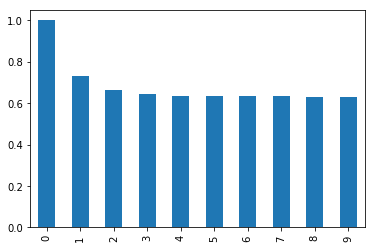

In [35]:
# My reading of the formula above is j and k are the same variable, so I use j to replace k 
# in the above formula

import pylab
import numpy as np
%matplotlib inline
import pandas as pd

# input z vector
# z = [5,2,9] # thinking of it as 3 image inputs 
# z = [2,2,2,2,2,2,2,2,2,2] # 10 image inputs
z = [1,2,3,4,5,6,7,8,9,10]
# z = np.random.rand(10)*3 # 10 linearly spaced numbers

# set empty list for y
y = []

# calculate y
K = len(z)
bottom = 0
for j in range(K):
    top = np.exp(z[j])
    bottom = top + bottom
    y.append(top/bottom)

    
data = pd.DataFrame({'x':z, 'y':y})
# pylab.plot(z,y) # sin(x)/x
data.y.plot(kind='bar')

# Categorical Cross-Entropy
- cost function for multi-class classification

----
> **SSE as cost function: **
- using the sum of squared errors as the cost function in our networks,
- when expecting only singular (scalar) output values.

----
> **multi-class classification problems: **
- using softmax
- output is a vector of probability values from the output units
- **data labels** can be expressed as a vector using **one-hot encoding**

----
> **How to express predictions and labels**
- you have a vector the length of the number of classes
- the label element is marked with a 1 while the other labels are set to 0. 
- our label vector for the image of the number 4 would be: $$ y=[0,0,0,0,1,0,0,0,0,0]$$
- our output prediction vector could be something like $$ \hat{y}=[0.047,0.048,0.061,0.07,0.330,0.062,0.001,0.213,0.013,0.150]$$

----
> **We want our error to be proportional to how far apart these vectors are**
- To calculate this distance, use the cross entropy
- our goal: to make our prediction vectors as close as possible to the label vectors by minimizing the cross entropy. 

----
> **The cross entropy calculation:**

In [36]:
Image(width=300, height=100, url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5893b106_cross-entropy-diagram/cross-entropy-diagram.png')

----
> **Calculate cross entropy**: 
- the sum of the label elements times the (natural) log of the prediction probabilities
- this formula is not symmetric
- Flipping the vectors is a bad idea because the label vector has a lot of zeros and taking the log of zero will cause an error

----
> **What's cool about using one-hot encoding for the label vector**
- $y_j$ is 0 except for the one true class 
- all terms in that sum except for where $y_j=1$ are zero 
- the cross entropy is simply $D=−\log{\hat{y}}$ for the true label
- if your input image is of the digit 4 and it's labeled 4, then only the output of the unit corresponding to 4 matters in the cross entropy cost.

----
> **summary:**
- cross entropy is multi-class problem cost function
- calc cross entropy using $D(\hat{y}, y) = - \sum_j y_j\log{\hat{y_j}}$
- this forumla can be simplified: $D(\hat{y}, y) = E = -\log{\hat{y_j}}$
- whereas $ SSE = E = \frac{1}{2}\sum(y-\hat{y})^2 $


QUIZ QUESTION

If your label vector is [0, 0, 0, 1, 0] and the predicted probabilities are [0.27, 0.11, 0.33, 0.10, 0.19], what is the cross entropy?

In [37]:
import numpy as np
E = - np.log(0.1)
E

2.3025850929940455

# Sentiment Analysis with TFLearn

#### What can TFLearn do for us?

- initializing weights
- running the forward pass
- performing backpropagation to update the weights
- You end up just defining the architecture of the network (number and type of layers, number of units, etc.) and how it is trained

In [3]:
HTML('<iframe width="500" height="300" src="https://www.youtube.com/embed/bFxfodsBbzU?ecver=1" frameborder="0" allowfullscreen></iframe>')